# Lecture 1: Introduction

I just want to discuss some basic features of the course. We discuss the core references, the tooling for the course, student projects, and illustrate the basics of the potential outcomes model.

#### Causal questions

What is the causal effect of ...

* neighborhood of residence on educational performance, deviance, and youth development
* school vouchers on learning?
* of charter schools on learning?
* worker training on earnings?
* ...

What causal question brought you here?

## Core reference

The whole course is built on the following textbook:

* Winship, C., & Morgan, S. L. (2007). [*Counterfactuals and causal inference: Methods and principles for social research (Analytical methods for social research)*](https://www.amazon.com/Counterfactuals-Causal-Inference-Principles-Analytical/dp/1107694167/ref=dp_ob_title_bk). Cambridge, England: Cambridge University Press.

This is a rather non-standard textbook in economics. However, I very much enjoy working with it as it provides a coherent conceptual framework for a host of different methods for causal analysis. It then clearly delineates the special cases that allow the application of particular methods. 

We will follow their lead and structure our thinking around the **counterfactual approach to causal analysis** and its two key ingredients **potential outcome model** and **directed graphs**.

It is not very technical, so will also need to draw on more conventional resources to fill this gap.

* Wooldridge, J. M. (2001). [*Econometric analysis of cross section and panel data*](https://mitpress.mit.edu/books/econometric-analysis-cross-section-and-panel-data). Cambridge, MA: The MIT Press.

* Angrist, J. D., & Pischke, J. (2009). [*Mostly harmless econometrics: An empiricists companion*](https://www.amazon.com/Mostly-Harmless-Econometrics-Empiricists-Companion/dp/0691120358/ref=sr_1_1?keywords=mostly+harmless+econometrics&qid=1553511192&s=gateway&sr=8-1). Princeton, NJ: Princeton University Press.

## Tooling for the course

We will use open-source software and some of the tools building on it extensively throughout the course.

* Course website
* GitHub
* Slack
* Python 
* Scipy
* Jupyter 
* Travis CI
* Datasets

We will briefly discuss each of them, how they work together and allow for better economic research.

## Projects

Applying these methods and understanding their potential and limitations is only possible when bringing them to bear on one's one research project. So we will work on student projects during the course. Details and an example are provided [here](https://github.com/HumanCapitalAnalysis/student-project-template).

## Causal graphs 

One unique feature of our core textbook is the use of the potential outcome model and causal graphs. There is a contrast between two approaches.

* regression-based
* path-oriented

This is what to expect:

<img src="material/causal_graph.png" height="500" width=500 />

There are three general strategies to estimate causal effects and their applicability depends on the exact structure of the causal graph.

* condition on variables, i.e. matching and regression-based estimation 
* exogenous variation, i.e. instrumental variables estimation
* establish an exhaustive and isolated mechanism, i.e. structural estimation

The key message for now:

* There is often more than one way to estimate a causal effect with differing demands about knowledge and observability

Pearl (2009) is the seminal reference on the use of graphs to represent general causal representations.



## Potential outcome model


The potential outcome model serves us several purposes:

* help stipulate assumptions
* evaluate alternative data analysis techniques
* think carefully about process of causal exposure

### Basic setup

There are three simple variables:

* $D$, treatment
* $Y_1$, outcome in the treatment state
* $Y_0$, outcome in the no-treatment state

### Examples

* economics of education
* health economics
* industrial organization
* $...$

### Exploration

We will use our first dataset to illustrate the basic problems of causal analysis. We will use the original data from the article below:

* LaLonde, R. J. (1986). Evaluating the Econometric Evaluations of Training Programs with Experimental Data. *The American Economic Review*, 76(4), 604-620.

He summarizes the basic setup as follows:

> The National Supported Work Demonstration (NSW) was temporary employment program desinged to help disadvantaged workers lacking basic job skills move into the labor market by giving them work experience and counseling in sheltered environment. Unlike other federally sponsored employment programs, the NSW program assigned qualified applications randomly. Those assigned to the treatment group received all the benefits of the NSW program, while those assigned to the control group were left to fend for themselves.

What is the *effect* of the program?

We will have a quick look at a subset of the data to illustrate the **fundamental problem of evaluation**, i.e. we only observe one of the potential outcomes depending on the treatment status but never both.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# We collected a host of data from two other influential textbooks.
df = pd.read_csv('../../datasets/processed/angrist_pischke/nswre74.csv')
df.head()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
0,1,37,11,1,0,1,1,0.0,0.0,9930.0460,1369.0
1,1,22,9,0,1,0,1,0.0,0.0,3595.8940,484.0
2,1,30,12,1,0,0,0,0.0,0.0,24909.4500,900.0
3,1,27,11,1,0,0,1,0.0,0.0,7506.1460,729.0
4,1,33,8,1,0,0,1,0.0,0.0,289.7899,1089.0


In [11]:
df.describe()

,treat,age,ed,black,hisp,married,nodeg,re74,re75,re78,age2
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265311,1377.138368,5300.763699,693.977528
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582400,3150.960771,6631.491695,429.781821
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,289.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,400.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,3701.812000,576.000000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388900,1220.836000,8124.715000,784.000000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.680000,25142.240000,60307.930000,3025.000000


In [12]:
# It is important to check for missing values first.
for column in df.columns:
    assert not df[column].isna().any()
    
# There is a presentation by Benedikt Kauf on testing your data in the next hackathon.

Note that this lecture, just as all other lectures, is available on [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/HumanCapitalAnalysis/microeconometrics/master?filepath=lectures%2F01_introduction%2Flecture.ipynb) so you can easily continue working on it and take your exploration to another direction.

There are numerous discrete variables in this dataset describing the individual's background. How does their distribution look like?

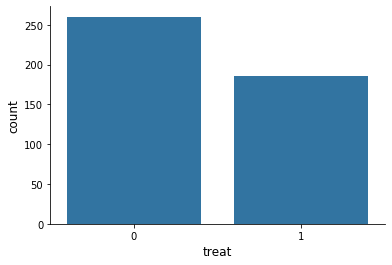

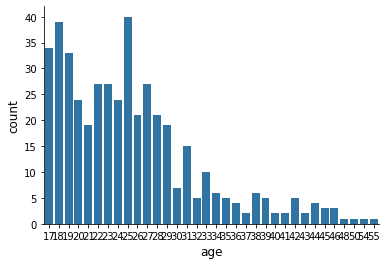

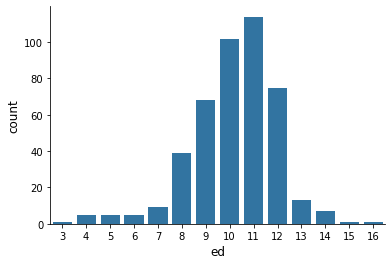

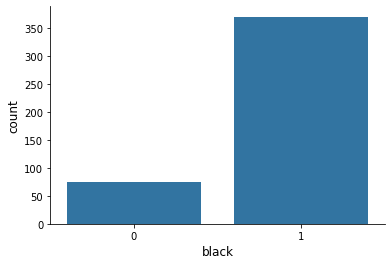

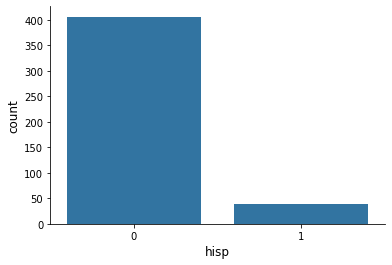

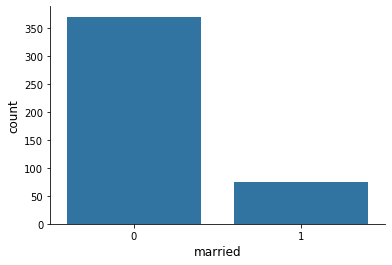

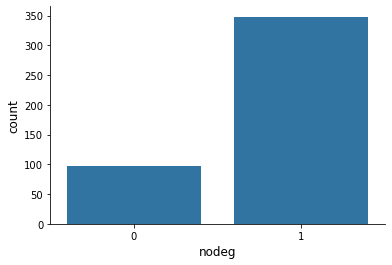

In [13]:
columns = ['treat', 'age', 'ed', 'black', 'hisp', 'married', 'nodeg']
for column in columns:
    sns.countplot(df[column], color="#1f77b4")
    plt.show()

How about the continous earnings variable?

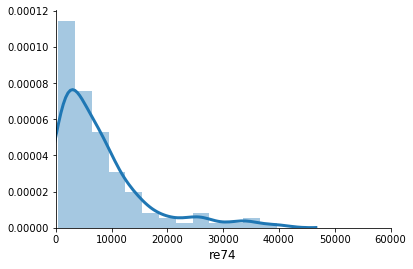

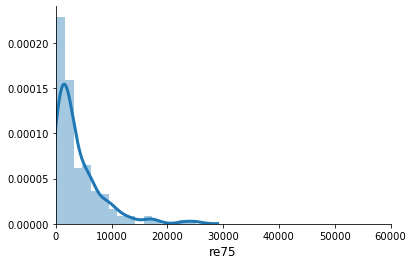

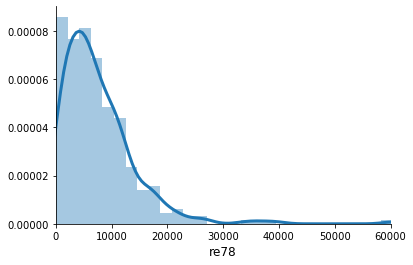

In [14]:
columns = ['re74', 're75', 're78']
for column in columns:
    nonzero_entries = df[column].where(df[column] > 0).dropna()
    ax = sns.distplot(nonzero_entries)
    ax.set_xlim(0, 60000)
    plt.show()

What is the data that corresponds to $(Y, Y_1, Y_0, D)$?

In [15]:
# We first create True / False
is_treated = df['treat'] == 1

df['Y'] = df['re78']
df['Y_0'] = df.loc[~is_treated, 're78']
df['Y_1'] = df.loc[is_treated, 're78']

df['D'] = np.nan
df.loc[~is_treated, 'D'] = 0
df.loc[is_treated, 'D'] = 1

Let us get a basic impression on how the distribution of earnings looks like by treatment status.

In [16]:
df.groupby('D')['re78'].describe()

,count,mean,std,min,25%,50%,75%,max
D,,,,,,,,
0.0,260.0,4554.801126,5483.835991,0.0,0.0000,3138.7955,7288.420,39483.53
1.0,185.0,6349.143530,7867.402218,0.0,485.2298,4232.3090,9642.999,60307.93


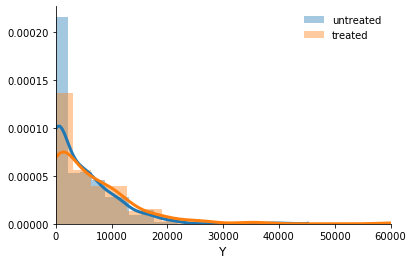

In [17]:
ax = sns.distplot(df['Y'][~is_treated], label='untreated')
ax = sns.distplot(df['Y'][is_treated], label='treated')
ax.set_xlim(0, 60000)
ax.legend();

In [9]:
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen('http://bit.ly/2DeuEQx')
HTML(html.read().decode('utf-8'))

URLError: <urlopen error [Errno -2] Name or service not known>

In [18]:
from IPython.display import HTML
HTML(open("../../configurations/custom.css").read())